In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data (1).xlsx


In [0]:
Jugadores_DF = pd.read_excel(io.BytesIO(uploaded['data.xlsx']), encoding= 'unicode_escape')
Jugadores_DF.head()

,Cons,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,?110.5M,?565K,2202.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,?226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,?77M,?405K,2228.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,?127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,?118.5M,?290K,2143.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,?228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,?72M,?260K,1471.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,?138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,?102M,?355K,2281.0,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,?196.4M


In [0]:
VarNum = ['Overall', 'Crossing','Finishing',  'ShortPassing',  'Dribbling','LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility',  
           'Stamina','Volleys','FKAccuracy','Reactions','Balance','ShotPower','Strength','LongShots','Aggression','Interceptions','HeadingAccuracy','Curve',
           'Jumping','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']

VarInfo = ['ID', 'Name','Nationality','Club','Position']

In [0]:
DFInfo = Jugadores_DF[VarInfo+VarNum]
DFHabil = Jugadores_DF[VarInfo+VarNum]
DFInfo = DFInfo.dropna()
DFInfo=DFInfo.reset_index(drop=True)
DFHabil = DFHabil.dropna()
DFHabil=DFHabil.reset_index(drop=True)

del DFHabil['ID']
del DFHabil['Name']
del DFHabil['Finishing']
del DFHabil['Nationality']
del DFHabil['Club']
del DFHabil['Position']

del DFInfo['Crossing']
del DFInfo['Finishing']
del DFInfo['ShortPassing']
del DFInfo['Dribbling']
del DFInfo['LongPassing']
del DFInfo['BallControl']
del DFInfo['Acceleration']
del DFInfo['SprintSpeed']
del DFInfo['Agility']
del DFInfo['Stamina']
del DFInfo['Volleys']
del DFInfo['FKAccuracy']
del DFInfo['Reactions']
del DFInfo['Balance']
del DFInfo['ShotPower']
del DFInfo['Strength']
del DFInfo['LongShots']
del DFInfo['Aggression']
del DFInfo['Interceptions']
del DFInfo['HeadingAccuracy']
del DFInfo['Curve']
del DFInfo['Jumping']
del DFInfo['Positioning']
del DFInfo['Vision']
del DFInfo['Penalties']
del DFInfo['Composure']
del DFInfo['Marking']
del DFInfo['StandingTackle']
del DFInfo['SlidingTackle']


DFInfo

,ID,Name,Nationality,Club,Position,Overall
0,158023,L. Messi,Argentina,FC Barcelona,RF,94
1,20801,Cristiano Ronaldo,Portugal,Juventus,ST,94
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,LW,92
3,193080,De Gea,Spain,Manchester United,GK,91
4,192985,K. De Bruyne,Belgium,Manchester City,RCM,91
...,...,...,...,...,...,...
17885,238813,J. Lundstram,England,Crewe Alexandra,CM,47
17886,243165,N. Christoffersson,Sweden,Trelleborgs FF,ST,47
17887,241638,B. Worman,England,Cambridge United,ST,47
17888,246268,D. Walker-Rice,England,Tranmere Rovers,RW,47


In [0]:
DFHabil

,Overall,Crossing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94,84.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,86.0,94.0,95.0,95.0,85.0,59.0,94.0,48.0,22.0,70.0,93.0,68.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,94,84.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,87.0,76.0,96.0,70.0,95.0,79.0,93.0,63.0,29.0,89.0,81.0,95.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,92,79.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,84.0,87.0,94.0,84.0,80.0,49.0,82.0,56.0,36.0,62.0,88.0,61.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,91,17.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,13.0,19.0,90.0,43.0,31.0,64.0,12.0,38.0,30.0,21.0,21.0,67.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,91,93.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,82.0,83.0,91.0,77.0,91.0,75.0,91.0,76.0,61.0,55.0,85.0,63.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17885,47,34.0,49.0,42.0,45.0,43.0,54.0,57.0,60.0,40.0,25.0,34.0,49.0,76.0,43.0,47.0,38.0,46.0,46.0,40.0,30.0,55.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
17886,47,23.0,43.0,39.0,25.0,40.0,41.0,39.0,38.0,43.0,36.0,20.0,40.0,52.0,41.0,67.0,42.0,47.0,16.0,52.0,32.0,47.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
17887,47,25.0,38.0,45.0,28.0,44.0,70.0,69.0,50.0,55.0,38.0,27.0,47.0,58.0,45.0,32.0,45.0,32.0,15.0,46.0,38.0,60.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
17888,47,44.0,42.0,51.0,32.0,52.0,61.0,60.0,52.0,40.0,40.0,32.0,21.0,71.0,64.0,48.0,34.0,33.0,22.0,39.0,34.0,42.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


In [0]:
del DFHabil['Overall']
DFHabil.head()

,Crossing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,84.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,86.0,94.0,95.0,95.0,85.0,59.0,94.0,48.0,22.0,70.0,93.0,68.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,84.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,87.0,76.0,96.0,70.0,95.0,79.0,93.0,63.0,29.0,89.0,81.0,95.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,79.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,84.0,87.0,94.0,84.0,80.0,49.0,82.0,56.0,36.0,62.0,88.0,61.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,17.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,13.0,19.0,90.0,43.0,31.0,64.0,12.0,38.0,30.0,21.0,21.0,67.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,93.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,82.0,83.0,91.0,77.0,91.0,75.0,91.0,76.0,61.0,55.0,85.0,63.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [0]:
len(DFHabil)

17890

In [0]:
len(DFInfo)

17890

In [0]:
DFhabilNormal = DFHabil.transform(lambda x: (x - x.mean()) / x.std()) 
DFhabilNormal.head()
# SE NORMALIZAN LAS VARIABLES DE MODO QUE LOS CLUSTER NO SE BASEN EN CUANTO A SI EL JUGADOR TIENE UN DESEMPEÑO ALTO, SINO QUE SE BASE EN EL TIPO DE JUGADOR QUE ES.

,Crossing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,1.865397,2.131029,2.199433,2.238039,2.255326,1.766085,1.450544,1.861346,0.553296,2.433962,2.923756,3.676597,2.194557,1.713908,-0.504814,2.434600,-0.454129,-1.193000,1.018963,2.488980,0.243818,2.253950,2.871824,1.684905,3.269883,-0.717231,-0.908968,-0.923089
1,1.865397,1.517879,1.723379,1.584975,2.135286,1.632282,1.791409,1.590419,1.559888,2.490493,1.894114,3.787418,0.427235,2.294917,1.089440,2.382643,0.410024,-0.854757,2.112904,1.836477,2.524800,2.305182,2.021845,2.322086,3.182299,-0.968739,-0.770429,-1.064078
2,1.593013,1.722262,2.146538,1.650281,2.195306,1.966790,1.723236,2.200005,1.119504,2.320900,2.523340,3.565775,1.416936,1.423404,-1.301941,1.811108,0.006753,-0.516513,0.558357,2.217103,-0.347547,1.997791,2.376003,2.067213,3.094715,-1.019041,-1.093687,-0.594115
3,-1.784556,-0.594083,-1.979262,-0.112992,-0.985749,-0.508563,-0.458298,-0.238341,-1.271154,-1.692792,-1.366420,3.122487,-1.481472,-1.423540,-0.106251,-1.825931,-1.030231,-0.806436,-1.802252,-1.426039,0.159338,-1.947052,1.030202,-0.545225,0.817536,-1.622661,-1.232226,-1.534040
4,2.355689,2.267285,1.617590,2.499265,1.955226,0.896367,0.768815,1.048564,1.685713,2.207839,2.294530,3.233309,0.922086,2.062513,0.770589,2.278727,1.158957,0.691499,0.155326,2.053978,-0.178586,1.895328,2.871824,1.939777,2.569212,1.043328,0.476422,0.251817


In [0]:
len(DFhabilNormal)

17890

### Componentes Principales

##### Función Reemplazo de posición

In [0]:
train = np.array(DFhabilNormal)

### K-Means

In [0]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in Nc]
score = [kmeans[i].fit(train).score(train) for i in range(len(kmeans))]

##### Codo

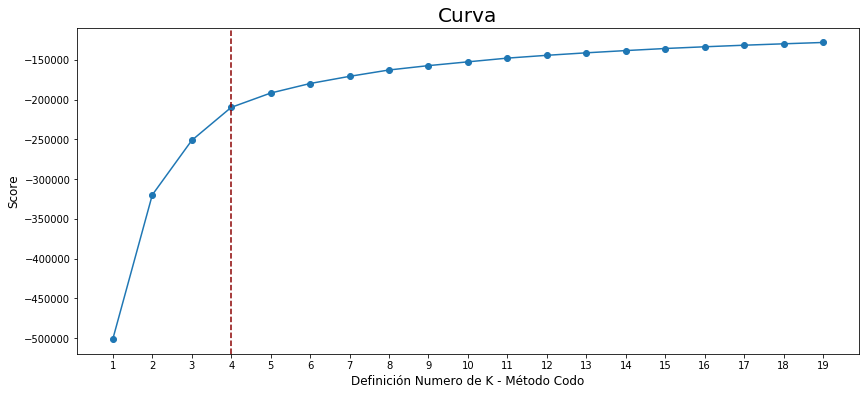

In [0]:
# Plot the results
fig, ax0 = plt.subplots(figsize = (14, 6))
plt.plot(Nc, score, marker='o')
plt.axvline(x = 4, color = "#8b0000", linestyle = "--")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("Definición Numero de K - Método Codo", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.title("Curva", fontsize = 20)
plt.show()


### Definición de Cluster y Centroides

In [0]:
k_clusters = 4
kmeans = KMeans(n_clusters = k_clusters, algorithm = "elkan", random_state = 0)
kmeans = kmeans.fit(train)
clusters = kmeans.predict(train)
centroids = kmeans.cluster_centers_

In [0]:
DFCentroides=pd.DataFrame(centroids)													                                                                                                                                                                  										
DFCentroides.columns = ['Crossing','ShortPassing','Dribbling','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Stamina','Volleys','FKAccuracy','Reactions','Balance','ShotPower','Strength','LongShots','Aggression','Interceptions','HeadingAccuracy','Curve','Jumping','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']
#DFCentroides.columns = ['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12','H13','H14','H15','H16','H17','H18','H19','H20','H21','H22','H23','H24','H25','H26','H27','H28']
#DFCentroides["Cluster"] = 'Centroides'
DFCentroides

,Crossing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,-1.934039,-2.141699,-2.199418,-1.758439,-2.307814,-1.761319,-1.776719,-1.578629,-2.060681,-1.726846,-1.627449,-0.330625,-1.480230,-1.913868,-0.374721,-1.792310,-1.701193,-1.431255,-2.180975,-1.768778,-0.627156,-1.984859,-1.161880,-1.819138,-1.188934,-1.610565,-1.548204,-1.481995
1,0.814206,0.808864,0.695378,0.871319,0.737356,0.375397,0.343378,0.527712,0.676553,0.664928,0.845678,0.763380,0.446661,0.746013,0.181461,0.798693,0.651237,0.663108,0.377223,0.849802,0.246936,0.690887,0.868321,0.581692,0.811663,0.591613,0.605614,0.567652
2,-0.263435,-0.109586,-0.364974,-0.100745,-0.229241,-0.245100,-0.196732,-0.439453,0.126621,-0.616063,-0.472793,-0.340269,-0.318158,-0.464100,0.393851,-0.622830,0.452545,0.693418,0.419300,-0.534645,0.196486,-0.531570,-0.706655,-0.497204,-0.332652,0.700248,0.760191,0.774707
3,0.120106,0.052560,0.455626,-0.173916,0.315615,0.517172,0.509915,0.473372,-0.070044,0.556996,0.176079,-0.370130,0.402756,0.388276,-0.448474,0.442115,-0.508401,-0.867652,0.012678,0.288426,-0.224666,0.544073,0.204529,0.565328,-0.097311,-0.726190,-0.825870,-0.824393


In [0]:
DFCentroidesConv=(DFCentroides*DFHabil.std())+DFHabil.mean()

In [0]:
DFCentroidesConv = DFCentroidesConv.T

In [0]:
DFCentroidesConv.columns = ['C0','C1','C2','C3']

In [0]:
DFCentroidesConv

,C0,C1,C2,C3
Crossing,14.256024,64.703921,44.922298,51.962739
ShortPassing,27.283635,70.592869,57.111587,59.491611
Dribbling,13.837851,68.565194,48.518793,64.032579
LongPassing,25.804217,66.072202,51.187537,50.067109
BallControl,19.972892,70.708888,54.604284,63.682208
Acceleration,38.274598,70.212879,60.938072,72.332033
SprintSpeed,38.660643,69.759447,61.836806,72.202302
Agility,40.211847,71.310094,57.030769,70.507803
Stamina,30.450301,73.959198,65.217916,62.091885
Volleys,12.397590,54.706759,32.046738,52.797503


In [0]:
DFCentroidesConv=DFCentroidesConv.reset_index(drop=True)
DFCentroidesConv
DFCentroidesConv["Habilidad"] = ['Crossing','ShortPassing','Dribbling','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Stamina','Volleys','FKAccuracy','Reactions','Balance','ShotPower','Strength','LongShots','Aggression','Interceptions','HeadingAccuracy','Curve','Jumping','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']
DFCentroidesConv

,C0,C1,C2,C3,Habilidad
0,14.256024,64.703921,44.922298,51.962739,Crossing
1,27.283635,70.592869,57.111587,59.491611,ShortPassing
2,13.837851,68.565194,48.518793,64.032579,Dribbling
3,25.804217,66.072202,51.187537,50.067109,LongPassing
4,19.972892,70.708888,54.604284,63.682208,BallControl
5,38.274598,70.212879,60.938072,72.332033,Acceleration
6,38.660643,69.759447,61.836806,72.202302,SprintSpeed
7,40.211847,71.310094,57.030769,70.507803,Agility
8,30.450301,73.959198,65.217916,62.091885,Stamina
9,12.397590,54.706759,32.046738,52.797503,Volleys


In [0]:
DFCentroidesConv.std()
DFDesvEst=pd.DataFrame({'Posicion' :['GK','VOL','DEF','ATK'],'DesvEst' :DFCentroidesConv.std()})
DFDesvEst=DFDesvEst.reset_index(drop=True)
DFDesvEst

,Posicion,DesvEst
0,GK,15.370151
1,VOL,5.166932
2,DEF,11.025037
3,ATK,12.475475


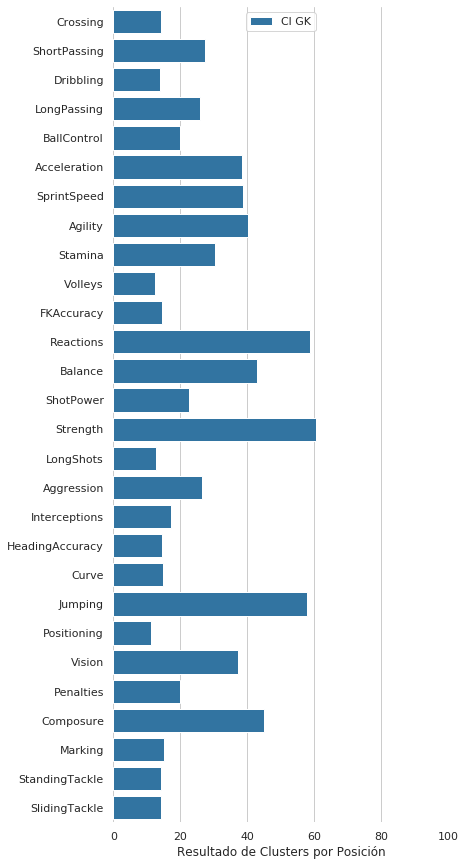

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Inicializar matplotlib
f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(x="C0", y="Habilidad", data=DFCentroidesConv,
            label="Cl GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper center", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

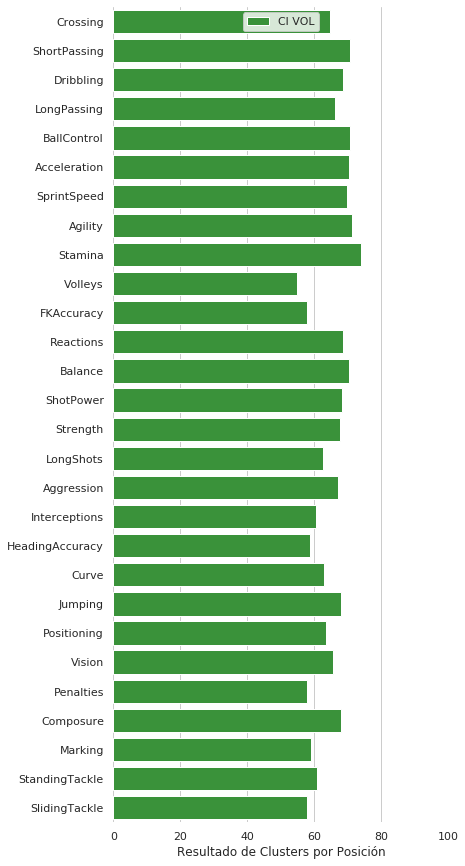

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Inicializar matplotlib
f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(x="C1", y="Habilidad", data=DFCentroidesConv,
            label="Cl VOL", color="#2ca02c")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper center", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

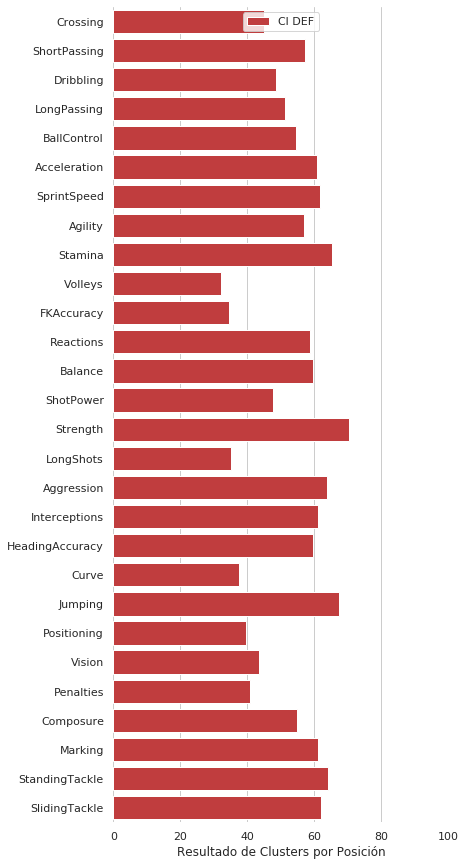

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Inicializar matplotlib
f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(x="C2", y="Habilidad", data=DFCentroidesConv,
            label="Cl DEF", color="#d62728")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper center", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

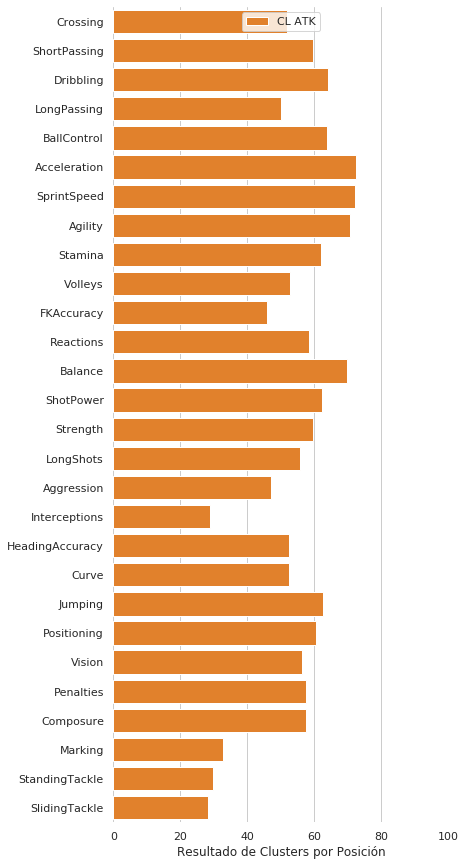

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Inicializar matplotlib
f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(x="C3", y="Habilidad", data=DFCentroidesConv,
            label="CL ATK", color="#ff7f0e")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper center", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

In [0]:
len(clusters)

17890

In [0]:
DFcluster=pd.DataFrame({'Posicion' : DFInfo["Position"], 'Cluster' : clusters})
DFcluster

,Posicion,Cluster
0,RF,1
1,ST,1
2,LW,1
3,GK,0
4,RCM,1
...,...,...
17885,CM,2
17886,ST,0
17887,ST,3
17888,RW,3


In [0]:
DFcluster_Doom = pd.concat([DFcluster['Posicion'], pd.get_dummies(DFcluster['Cluster'])],axis=1) 

In [0]:
DFcluster_Doom

,Posicion,0,1,2,3
0,RF,0,1,0,0
1,ST,0,1,0,0
2,LW,0,1,0,0
3,GK,1,0,0,0
4,RCM,0,1,0,0
...,...,...,...,...,...
17885,CM,0,0,1,0
17886,ST,1,0,0,0
17887,ST,0,0,0,1
17888,RW,0,0,0,1


In [0]:
DFcluster_Doom = DFcluster_Doom.rename(columns={0: 'Cl 0', 1: 'Cl 1',2: 'Cl 2',3: 'Cl 3'})
DFcluster_Doom

,Posicion,Cl 0,Cl 1,Cl 2,Cl 3
0,RF,0,1,0,0
1,ST,0,1,0,0
2,LW,0,1,0,0
3,GK,1,0,0,0
4,RCM,0,1,0,0
...,...,...,...,...,...
17885,CM,0,0,1,0
17886,ST,1,0,0,0
17887,ST,0,0,0,1
17888,RW,0,0,0,1


In [0]:
DFcluster_Doom0 = DFcluster_Doom.groupby('Posicion')['Cl 0'].sum().to_frame().reset_index()
DFcluster_Doom1 = DFcluster_Doom.groupby('Posicion')['Cl 1'].sum().to_frame().reset_index()
DFcluster_Doom2 = DFcluster_Doom.groupby('Posicion')['Cl 2'].sum().to_frame().reset_index()
DFcluster_Doom3 = DFcluster_Doom.groupby('Posicion')['Cl 3'].sum().to_frame().reset_index()

In [0]:
DFcluster_Resumen = pd.DataFrame({'Posicion' : DFcluster_Doom0["Posicion"],'CL 0' : DFcluster_Doom0["Cl 0"],'Cl 1' : DFcluster_Doom1["Cl 1"],'Cl 2' : DFcluster_Doom2["Cl 2"],'Cl 3' : DFcluster_Doom3["Cl 3"]})
DFcluster_Resumen


,Posicion,CL 0,Cl 1,Cl 2,Cl 3
0,CAM,0.0,395.0,13.0,540.0
1,CB,2.0,134.0,1614.0,1.0
2,CDM,0.0,509.0,416.0,9.0
3,CF,0.0,17.0,1.0,56.0
4,CM,0.0,764.0,314.0,294.0
5,GK,1988.0,0.0,1.0,0.0
6,LAM,0.0,10.0,0.0,11.0
7,LB,0.0,626.0,646.0,31.0
8,LCB,0.0,100.0,535.0,1.0
9,LCM,0.0,305.0,35.0,48.0


In [0]:
#kkk = DFcluster_Resumen["CL 0"]+DFcluster_Resumen["CL 1"]
DFcluster_Resumen["ACUM A CL VOL"]= DFcluster_Resumen.iloc[:, 1:3].sum(axis=1)
DFcluster_Resumen["ACUM A CL DEF"]= DFcluster_Resumen.iloc[:, 1:4].sum(axis=1)
DFcluster_Resumen["ACUM A CL ATK"]= DFcluster_Resumen.iloc[:, 1:5].sum(axis=1)
DFcluster_Resumen
DFcluster_Resumen.columns = ['Posicion','CL GK','CL VOL','CL DEF','CL ATK','ACUM A CL VOL','ACUM A CL DEF','ACUM A CL ATK']

DFcluster_Resumen["% CL GK"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["% CL VOL"] = DFcluster_Resumen.iloc[:, 2]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["% CL DEF"] = DFcluster_Resumen.iloc[:, 3]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["% CL ATK"] = DFcluster_Resumen.iloc[:, 4]/DFcluster_Resumen.iloc[:, 7]


DFcluster_Resumen["%A CL GK"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["%A CL VOL"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7] + DFcluster_Resumen.iloc[:, 2]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["%A CL DEF"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7] + DFcluster_Resumen.iloc[:, 2]/DFcluster_Resumen.iloc[:, 7]+DFcluster_Resumen.iloc[:, 3]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["%A CL ATK"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7] + DFcluster_Resumen.iloc[:, 2]/DFcluster_Resumen.iloc[:, 7]+DFcluster_Resumen.iloc[:, 3]/DFcluster_Resumen.iloc[:, 7]+DFcluster_Resumen.iloc[:, 4]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["MAX"] = DFcluster_Resumen[["% CL GK", "% CL VOL",'% CL DEF',"% CL ATK"]].max(axis=1)
DFcluster_Resumen=DFcluster_Resumen.sort_values(by=['MAX'], ascending=False)

DFcluster_Resumen

,Posicion,CL GK,CL VOL,CL DEF,CL ATK,ACUM A CL VOL,ACUM A CL DEF,ACUM A CL ATK,% CL GK,% CL VOL,% CL DEF,% CL ATK,%A CL GK,%A CL VOL,%A CL DEF,%A CL ATK,MAX
5,GK,1988.0,0.0,1.0,0.0,1988.0,1989.0,1989.0,0.999497,0.000000,0.000503,0.000000,0.999497,0.999497,1.000000,1.0,0.999497
1,CB,2.0,134.0,1614.0,1.0,136.0,1750.0,1751.0,0.001142,0.076528,0.921759,0.000571,0.001142,0.077670,0.999429,1.0,0.921759
18,RCB,0.0,93.0,557.0,1.0,93.0,650.0,651.0,0.000000,0.142857,0.855607,0.001536,0.000000,0.142857,0.998464,1.0,0.855607
26,ST,1.0,306.0,21.0,1801.0,307.0,328.0,2129.0,0.000470,0.143729,0.009864,0.845937,0.000470,0.144199,0.154063,1.0,0.845937
8,LCB,0.0,100.0,535.0,1.0,100.0,635.0,636.0,0.000000,0.157233,0.841195,0.001572,0.000000,0.157233,0.998428,1.0,0.841195
19,RCM,0.0,317.0,38.0,31.0,317.0,355.0,386.0,0.000000,0.821244,0.098446,0.080311,0.000000,0.821244,0.919689,1.0,0.821244
9,LCM,0.0,305.0,35.0,48.0,305.0,340.0,388.0,0.000000,0.786082,0.090206,0.123711,0.000000,0.786082,0.876289,1.0,0.786082
24,RW,0.0,85.0,2.0,278.0,85.0,87.0,365.0,0.000000,0.232877,0.005479,0.761644,0.000000,0.232877,0.238356,1.0,0.761644
3,CF,0.0,17.0,1.0,56.0,17.0,18.0,74.0,0.000000,0.229730,0.013514,0.756757,0.000000,0.229730,0.243243,1.0,0.756757
14,LW,0.0,90.0,2.0,282.0,90.0,92.0,374.0,0.000000,0.240642,0.005348,0.754011,0.000000,0.240642,0.245989,1.0,0.754011


In [0]:
from google.colab import files
DFcluster_Resumen.to_csv('filename.csv') 
files.download('filename.csv')


Text(0.5, 1.0, 'Cantidad de jugadores en cluster por Posición ')

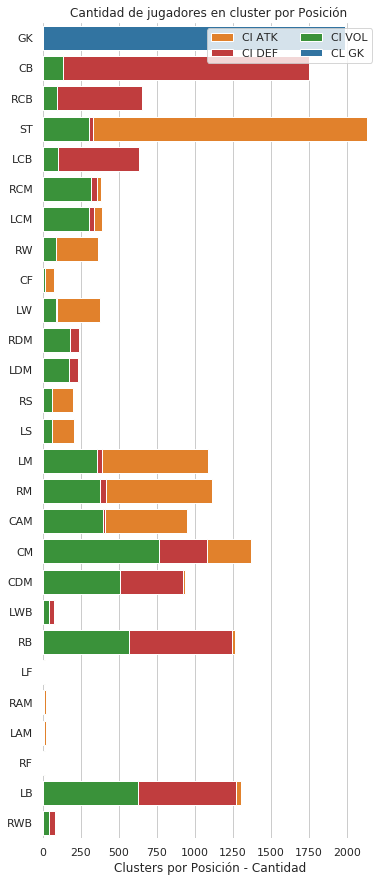

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Inicializar matplotlib
f, ax = plt.subplots(figsize=(6, 15))

# PLOTEAR

sns.barplot(x="ACUM A CL ATK", y="Posicion", data=DFcluster_Resumen,
            label="Cl ATK", color="#ff7f0e")

sns.barplot(x="ACUM A CL DEF", y="Posicion", data=DFcluster_Resumen,
            label="Cl DEF", color="#d62728")

sns.barplot(x="ACUM A CL VOL", y="Posicion", data=DFcluster_Resumen,
            label="Cl VOL", color="#2ca02c")

sns.barplot(x="CL GK", y="Posicion", data=DFcluster_Resumen,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2200), ylabel="",
       xlabel="Clusters por Posición - Cantidad")
sns.despine(left=True, bottom=True)
plt.title("Cantidad de jugadores en cluster por Posición")

Text(0.5, 1.0, 'Porcentaje de jugadores en cluster por Posición')

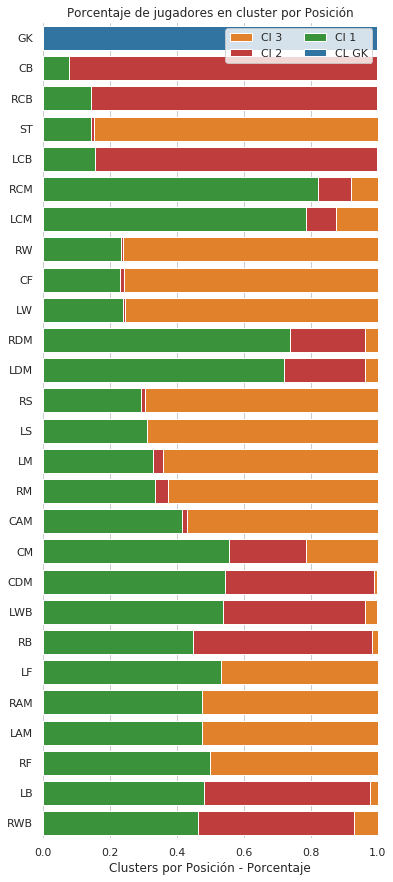

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 15))

# PLOTEAR

sns.barplot(x="%A CL ATK", y="Posicion", data=DFcluster_Resumen,
            label="Cl 3", color="#ff7f0e")

sns.barplot(x="%A CL DEF", y="Posicion", data=DFcluster_Resumen,
            label="Cl 2", color="#d62728")

sns.barplot(x="%A CL VOL", y="Posicion", data=DFcluster_Resumen,
            label="Cl 1", color="#2ca02c")

sns.barplot(x="%A CL GK", y="Posicion", data=DFcluster_Resumen,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",xlabel="Clusters por Posición - Porcentaje")
sns.despine(left=True, bottom=True)
plt.title("Porcentaje de jugadores en cluster por Posición")

Se evidencia que hay posiciones que el algoritmo identifica de forma mas facil que otras. 
De esta Forma se evidencian cuatro grupos claros:
1. ARQUERO:
  - GK (GOAL KEEPER).
2. DEFENSAS: 
  - CB (CENTRE BACK).
  - RCB (RIGHT CENTRE BACK).
  - LCB(LEFT CENTRE BACK).
3. VOLANTES DEFENSIVOS: 
  - LDM(LEFT DEFENSIVE MIDFIELD).
  - RDM(RIGHT DEFENSIVE MIDFIELD).
  - RCM(RIGHT CENTRE MIDDLE).
  - LCM(LEFT CENTRE MIDDLE).
3. OFENSIVOS: 
  - RM (RIGHT MIDFIELD). 
  - LM (LEFT MIDFIELD).
  - RS (RIGHT STRICKER).
  - ST (STRIKER).
  - LS (LEFT STRICKER).
  - CF (CENTER FORWARD).
  - LW (LEFT WINGER).
  - RAM (RIGHT ATTACKING MIDFIELD).
  - RW (RIGHT WINGER).
  - CAM (CENTRE ATTACKING MIDFIELD).
  - LAM (LEFT ATTACKING MIDFIELD).

Por otro lado hay posiciones que no son claramente identificadas por el algoritmo. Estas son:
  - RB (RIGHT BACK)
  - LB (LEFT BACK)
  - RWB (RIGHT WING BACK)
  - LWB (LEFT WING BACK)
  - CDM (CENTRE DEFENSIVE MIDFIELD)
  - CM (CENTRE MIDFIELD)
  
Dichas posiciones, son precisamente aquellas que tienen un perfil mixto en el juego como lo son: Los laterales (Jugador que requiere condiciones de ataque y defensa) y el volante central defensivo (Jugador que tiene condiciones de volante defensivo y de defensa central).

Nota: Las posiciones LF (LEFT FORWARD), RF (RIGHT FORWARD), LAM Y RAM son posiciones escasas. Ninguna de ellas cuenta con más de 30 jugadores por lo que no serán analizadas en el ejercicio.



## GRAFICA DE BARRAS PARA LOS DEFENSAS

In [0]:
DFcluster_Resumen_DEF = DFcluster_Resumen[DFcluster_Resumen.Posicion.isin(['CB','RCB','LCB'])]
DFcluster_Resumen_DEF = DFcluster_Resumen_DEF.sort_values(by=["CL DEF"], ascending=False)
DFcluster_Resumen_DEF["% Cl DEF"] = DFcluster_Resumen_DEF.iloc[:, 3]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF["A% Cl GK"] = DFcluster_Resumen_DEF.iloc[:, 1]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF["A% Cl VOL"] = DFcluster_Resumen_DEF.iloc[:, 2]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 1]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF["A% Cl DEF"] = DFcluster_Resumen_DEF.iloc[:, 3]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 2]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 1]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF["A% Cl ATK"] = DFcluster_Resumen_DEF.iloc[:, 4]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 3]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 2]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 1]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF

,Posicion,CL GK,CL VOL,CL DEF,CL ATK,ACUM A CL VOL,ACUM A CL DEF,ACUM A CL ATK,% CL GK,% CL VOL,% CL DEF,% CL ATK,%A CL GK,%A CL VOL,%A CL DEF,%A CL ATK,MAX,% Cl DEF,A% Cl GK,A% Cl VOL,A% Cl DEF,A% Cl ATK
1,CB,2.0,134.0,1614.0,1.0,136.0,1750.0,1751.0,0.001142,0.076528,0.921759,0.000571,0.001142,0.077670,0.999429,1.0,0.921759,0.921759,0.001142,0.077670,0.999429,1.0
18,RCB,0.0,93.0,557.0,1.0,93.0,650.0,651.0,0.000000,0.142857,0.855607,0.001536,0.000000,0.142857,0.998464,1.0,0.855607,0.855607,0.000000,0.142857,0.998464,1.0
8,LCB,0.0,100.0,535.0,1.0,100.0,635.0,636.0,0.000000,0.157233,0.841195,0.001572,0.000000,0.157233,0.998428,1.0,0.841195,0.841195,0.000000,0.157233,0.998428,1.0


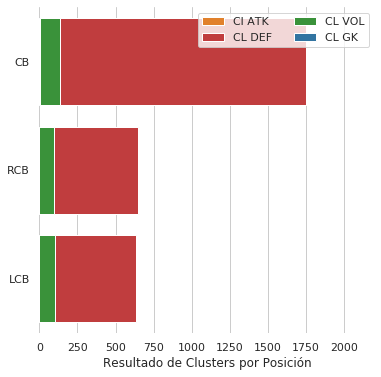

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 6))

# PLOTEAR

sns.barplot(x="ACUM A CL ATK", y="Posicion", data=DFcluster_Resumen_DEF,
            label="Cl ATK", color="#ff7f0e")

sns.barplot(x="ACUM A CL DEF", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL DEF", color="#d62728")

sns.barplot(x="ACUM A CL VOL", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="CL GK", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2200), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

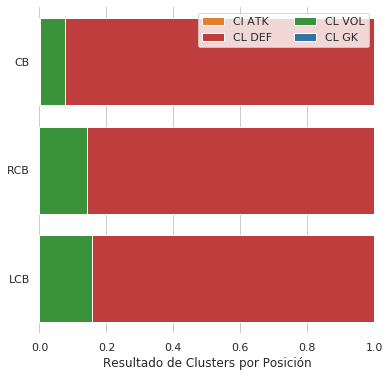

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 6))

# PLOTEAR

sns.barplot(x="A% Cl ATK", y="Posicion", data=DFcluster_Resumen_DEF,
            label="Cl ATK", color="#ff7f0e")

sns.barplot(x="A% Cl DEF", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL DEF", color="#d62728")

sns.barplot(x="A% Cl VOL", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="A% Cl GK", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

## GRAFICA DE BARRAS PARA LOS VOLANTES DEFENSIVOS

In [0]:
DFcluster_Resumen_VOL = DFcluster_Resumen[DFcluster_Resumen.Posicion.isin(['LDM','RDM','RCM','LCM'])]
DFcluster_Resumen_VOL = DFcluster_Resumen_VOL.sort_values(by=["CL VOL"], ascending=False)
DFcluster_Resumen_VOL["% CL VOL"] = DFcluster_Resumen_VOL.iloc[:, 2]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL["%A CL GK"] = DFcluster_Resumen_VOL.iloc[:, 1]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL["%A CL VOL"] = DFcluster_Resumen_VOL.iloc[:, 2]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 1]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL["%A CL DEF"] = DFcluster_Resumen_VOL.iloc[:, 3]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 2]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 1]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL["%A CL ATK"] = DFcluster_Resumen_VOL.iloc[:, 4]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 3]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 2]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 1]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL

,Posicion,CL GK,CL VOL,CL DEF,CL ATK,ACUM A CL VOL,ACUM A CL DEF,ACUM A CL ATK,% CL GK,% CL VOL,% CL DEF,% CL ATK,%A CL GK,%A CL VOL,%A CL DEF,%A CL ATK,MAX
19,RCM,0.0,317.0,38.0,31.0,317.0,355.0,386.0,0.0,0.821244,0.098446,0.080311,0.0,0.821244,0.919689,1.0,0.821244
9,LCM,0.0,305.0,35.0,48.0,305.0,340.0,388.0,0.0,0.786082,0.090206,0.123711,0.0,0.786082,0.876289,1.0,0.786082
20,RDM,0.0,182.0,55.0,9.0,182.0,237.0,246.0,0.0,0.739837,0.223577,0.036585,0.0,0.739837,0.963415,1.0,0.739837
10,LDM,0.0,172.0,58.0,9.0,172.0,230.0,239.0,0.0,0.719665,0.242678,0.037657,0.0,0.719665,0.962343,1.0,0.719665


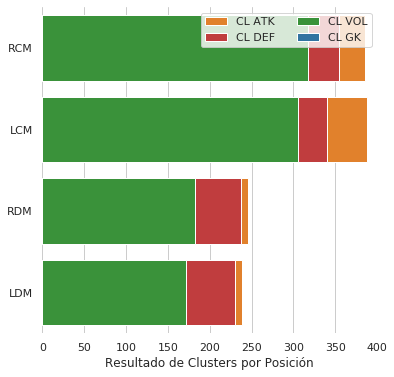

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 6))

# PLOTEAR

sns.barplot(x="ACUM A CL ATK", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="ACUM A CL DEF", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL DEF", color="#d62728")

sns.barplot(x="ACUM A CL VOL", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="CL GK", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

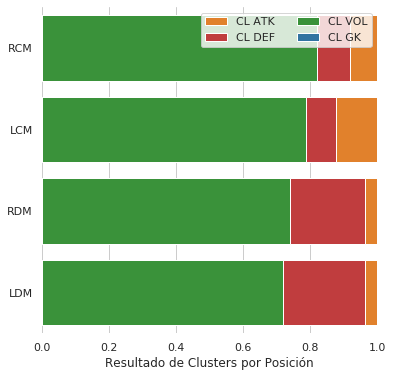

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 6))

# PLOTEAR

sns.barplot(x="%A CL ATK", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="%A CL DEF", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL DEF", color="#d62728")

sns.barplot(x="%A CL VOL", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="%A CL GK", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

GRAFICA DE BARRAS PARA LOS JUGADORES OFENSIVOS

In [0]:
DFcluster_Resumen_OFN = DFcluster_Resumen[DFcluster_Resumen.Posicion.isin(['RM','LM','RS','ST','LS','CF','LW','RW','CAM'])]
DFcluster_Resumen_OFN = DFcluster_Resumen_OFN.sort_values(by=["CL ATK"], ascending=False)
DFcluster_Resumen_OFN["% CL ATK"] = DFcluster_Resumen_OFN.iloc[:, 4]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN["%A CL GK"] = DFcluster_Resumen_OFN.iloc[:, 1]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN["%A CL VOL"] = DFcluster_Resumen_OFN.iloc[:, 2]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 1]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN["%A CL DEF"] = DFcluster_Resumen_OFN.iloc[:, 3]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 2]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 1]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN["%A CL ATK"] = DFcluster_Resumen_OFN.iloc[:, 4]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 3]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 2]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 1]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN

,Posicion,CL GK,CL VOL,CL DEF,CL ATK,ACUM A CL VOL,ACUM A CL DEF,ACUM A CL ATK,% CL GK,% CL VOL,% CL DEF,% CL ATK,%A CL GK,%A CL VOL,%A CL DEF,%A CL ATK,MAX
26,ST,1.0,306.0,21.0,1801.0,307.0,328.0,2129.0,0.00047,0.143729,0.009864,0.845937,0.00047,0.144199,0.154063,1.0,0.845937
22,RM,0.0,374.0,41.0,698.0,374.0,415.0,1113.0,0.00000,0.336029,0.036837,0.627134,0.00000,0.336029,0.372866,1.0,0.627134
12,LM,0.0,358.0,32.0,694.0,358.0,390.0,1084.0,0.00000,0.330258,0.029520,0.640221,0.00000,0.330258,0.359779,1.0,0.640221
0,CAM,0.0,395.0,13.0,540.0,395.0,408.0,948.0,0.00000,0.416667,0.013713,0.569620,0.00000,0.416667,0.430380,1.0,0.569620
14,LW,0.0,90.0,2.0,282.0,90.0,92.0,374.0,0.00000,0.240642,0.005348,0.754011,0.00000,0.240642,0.245989,1.0,0.754011
24,RW,0.0,85.0,2.0,278.0,85.0,87.0,365.0,0.00000,0.232877,0.005479,0.761644,0.00000,0.232877,0.238356,1.0,0.761644
13,LS,0.0,64.0,0.0,141.0,64.0,64.0,205.0,0.00000,0.312195,0.000000,0.687805,0.00000,0.312195,0.312195,1.0,0.687805
23,RS,0.0,59.0,2.0,139.0,59.0,61.0,200.0,0.00000,0.295000,0.010000,0.695000,0.00000,0.295000,0.305000,1.0,0.695000
3,CF,0.0,17.0,1.0,56.0,17.0,18.0,74.0,0.00000,0.229730,0.013514,0.756757,0.00000,0.229730,0.243243,1.0,0.756757


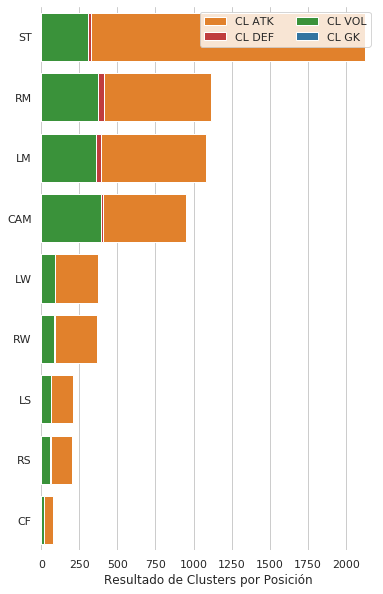

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 10))

# PLOTEAR

sns.barplot(x="ACUM A CL ATK", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="ACUM A CL DEF", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL DEF", color="#d62728")

sns.barplot(x="ACUM A CL VOL", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="CL GK", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2200), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

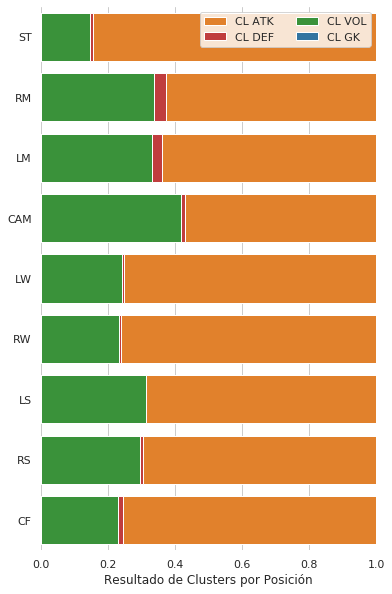

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 10))

# PLOTEAR

sns.barplot(x="%A CL ATK", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="%A CL DEF", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL DEF", color="#d62728")

sns.barplot(x="%A CL VOL", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="%A CL GK", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)